<a href="https://colab.research.google.com/github/ingcarlosleon/data-Mapainversiones/blob/main/scripts/exploratory-data-analysis/Avance1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

##**TechSprint para una mayor transparencia gubernamental**

📑**Planteamiento del problema 4:** ¿Cómo podemos mejorar la identificación de brechas en infraestructuras y desarrollo en la planificación de inversiones públicas y privadas para apoyar la resiliencia climática, la igualdad de género, la buena gobernanza y el desarrollo sostenible?

📘 **Más sobre el problema:** https://idb-air-techsprint.vercel.app/problem-statements/planteamiento-del-problema-4

📚 **Equipo:** 2

🧑 **Integrantes:**
> Alice Raquel Rambo

> David Arnaldo	Durand Velasquez

> Doug McCalmont

> Milton Javier Mahecha Silva

> Carlos Julio León Caicedo

👩 **Mentores BID**:
> Carole Alazki (**Product Owner**)

> Anyela Milena (**Arquitecta de Datos**)

📅 Agosto de 2024
---

#**🚀 Avance 1. Análisis exploratorio de datos:**
El objetivo de este avance es realizar un análisis exploratorio de los datos para identificar las características más relevantes, con el fin de reducir la dimensionalidad y mejorar la capacidad de generalización del modelo a desarrollar. Se abordarán y corregirán los problemas detectados en los datos de [Proyectos y Obras de Inversión de la República Argentina](https://idb-air-techsprint.vercel.app/datasets/investment-projects-and-works-arg), y se estandarizará y recomendará una estructurade datos que permita la replicación del modelo con datos de otros países, fomentaando su aplicabilidad y robustez en diferentes contextos geográficos.

Realizamos un análisis de los conjuntos de datos y columnas existentes contestando las siguientes preguntas:

*   ¿Cuáles son las estadísticas resumidas del conjunto de datos?
*   ¿Hay valores faltantes en el conjunto de datos?
*   ¿Se pueden identificar patrones de ausencia?
*   ¿Hay valores atípicos en el conjunto de datos?
*   ¿Cuál es la cardinalidad de las variables categóricas?
*   ¿Existen distribuciones sesgadas en el conjunto de datos?
*   ¿Necesitamos aplicar alguna transformación no lineal?
*   ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
*   ¿Hay correlación entre las variables dependientes e independientes?
*   ¿Cómo se distribuyen los datos en función de diferentes categorías?
*   ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

In [ ]:
!pip install pandas requests frictionless

**Analísis de los Conjuntos de Datos de Argentina**



**Obtener los Datos**: Cargamos los tres conjuntos de datos desde las fuentes CSV.

Fuente: https://idb-air-techsprint.vercel.app/datasets/investment-projects-and-works-arg

In [40]:
import pandas as pd
import requests
from io import StringIO

# URLs de los datasets desde el JSON
url_spatial_data_works = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/OBRAS/CSV/2024/06/19/dataset_mop.csv"
url_investment_projects = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/PROYECTOS/CSV/2024/06/19/dataset_proyectosmop.csv"
url_datos_espaciales = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/DATOS_ESPACIALES/CSV/2024/06/25/dataset_geojson.csv"

# Función para cargar los datasets desde la URL
def load_csv_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Nos Aseguramos que la solicitud fue exitosa
    data = response.content.decode('utf-8')
    return pd.read_csv(StringIO(data))

# Cargar los datasets en DataFrames de pandas
df_spatial_data_works = load_csv_from_url(url_spatial_data_works)
df_spatial_data_works_dis_cat = df_spatial_data_works # Copia del dataframe para poder más adelante determinar cómo se distribuyen los datos en función de diferentes categorías
df_investment_projects = load_csv_from_url(url_investment_projects)
df_datos_espaciales = load_csv_from_url(url_datos_espaciales)

##**Dataset: Datos espaciales - Obras de la República Argentina (spatial-data-works)**

Contiene la información espacial de las Obras de la República Argentina


###**<center>🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>**

In [3]:
# Obtener información general sobre el DataFrame
df_spatial_data_works.info()
print("\nSpatial Data Works - Describe\n")
df_spatial_data_works.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idproyecto                      7317 non-null   int64  
 1   numeroobra                      7317 non-null   object 
 2   codigobapin                     7317 non-null   object 
 3   fechainicioanio                 7317 non-null   int64  
 4   fechafinanio                    7317 non-null   int64  
 5   nombreobra                      7317 non-null   object 
 6   descripicionfisica              7317 non-null   object 
 7   montototal                      7317 non-null   float64
 8   sectornombre                    7317 non-null   object 
 9   avancefinanciero                7317 non-null   float64
 10  avancefisico                    7317 non-null   float64
 11  entidadejecutoranombre          7317 non-null   object 
 12  duracionobrasdias               73

,idproyecto,fechainicioanio,fechafinanio,montototal,avancefinanciero,avancefisico,duracionobrasdias,codigo_bahra,organismo_financiador_prestamo
count,7.317000e+03,7317.000000,7317.000000,7.317000e+03,7317.000000,7317.000000,7317.000000,3.977000e+03,2.100000e+02
mean,7.230890e+08,2021.288916,2022.269373,5.918530e+08,71.909481,74.819638,351.468908,2.927189e+14,7.117020e+07
std,4.488914e+08,1.604703,1.181463,3.175574e+09,33.753074,35.889589,491.368452,3.037337e+14,5.210177e+08
min,1.610000e+03,2008.000000,2020.000000,1.000000e+00,0.000000,0.000000,1.000000,2.007000e+03,2.280000e+03
25%,1.001445e+07,2021.000000,2021.000000,1.154832e+07,45.170000,48.920000,120.000000,6.294029e+13,2.940000e+03
50%,1.003112e+09,2021.000000,2022.000000,3.604513e+07,90.000000,100.000000,181.000000,1.410527e+14,8.945000e+03
75%,1.003120e+09,2022.000000,2023.000000,1.637773e+08,100.000000,100.000000,386.000000,5.404902e+14,8.945000e+03
max,1.003131e+09,2024.000000,2029.000000,9.408170e+10,100.000000,100.000000,5568.000000,9.401400e+14,4.312100e+09


###**<center>🤔¿Hay valores faltantes en el conjunto de datos?</center>**

In [4]:
#Verificamos si existen valores faltantes en nuestro conjunto
print("¿Hay valores faltantes en el conjunto de datos spatial-data-works?")
if (df_spatial_data_works.isna().values.any())==True:
  print("Sí")
else:
  print("No")

¿Hay valores faltantes en el conjunto de datos spatial-data-works?
Sí


In [5]:
import pandas as pd
# Calcular la cantidad de valores faltantes por columna
missing_values = df_spatial_data_works.isnull().sum()

# Filtrar las columnas con valores faltantes
missing_columns = missing_values[missing_values > 0]

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_columns / len(df_spatial_data_works)) * 100

# Crear un DataFrame para mostrar los resultados
missing_data = pd.DataFrame({
    'Columna': missing_columns.index,
    'Valores Faltantes': missing_columns.values,
    'Porcentaje Faltante': missing_percentage.values
})

# Ordenar el DataFrame por porcentaje faltante en orden descendente
missing_data_sorted = missing_data.sort_values('Porcentaje Faltante', ascending=False)

# Mostrar el DataFrame ordenado
print(missing_data_sorted)

                          Columna  Valores Faltantes  Porcentaje Faltante
1         organismo_financiador_2               7312            99.931666
2  organismo_financiador_prestamo               7107            97.129971
0                    codigo_bahra               3340            45.647123
4                 contraparte_val                225             3.075031
3                 contraparte_key                182             2.487358
5                contraparte_cuit                182             2.487358
6           contraparte_modalidad                182             2.487358


Se presentan algunos valores faltantes de las columnas organismo_financiador_2, organismo_financiador_prestamo, entre otras que van desde el 99.93% hasta el 2.48%, a continuación se realiza un gráfico de barras para analizar las columnas con datos faltantes.

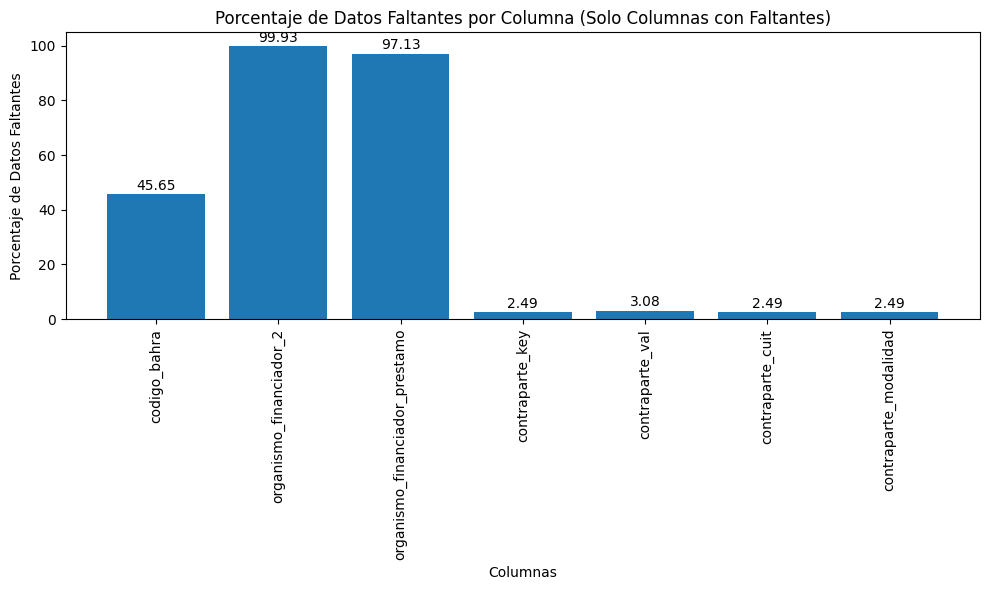

In [6]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de datos faltantes por columna
missing_percentage = df_spatial_data_works.isnull().sum() * 100 / len(df_spatial_data_works)

# Filtrar las columnas con datos faltantes
missing_percentage_filtered = missing_percentage[missing_percentage > 0]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentage_filtered.index, missing_percentage_filtered.values)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Datos Faltantes')
plt.title('Porcentaje de Datos Faltantes por Columna (Solo Columnas con Faltantes)')
plt.xticks(rotation=90)

# Agregar etiquetas con el valor faltante a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Se deben tener en cuenta que columnas o datos debemos eliminar del dataframe

In [7]:
missing_percentage_filtered.index

Index(['codigo_bahra', 'organismo_financiador_2',
       'organismo_financiador_prestamo', 'contraparte_key', 'contraparte_val',
       'contraparte_cuit', 'contraparte_modalidad'],
      dtype='object')

###**<center>🤔¿Se pueden identificar patrones de ausencia?</center>**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, 'idproyecto'),
  Text(1.5, 0, 'numeroobra'),
  Text(2.5, 0, 'codigobapin'),
  Text(3.5, 0, 'fechainicioanio'),
  Text(4.5, 0, 'fechafinanio'),
  Text(5.5, 0, 'nombreobra'),
  Text(6.5, 0, 'descripicionfisica'),
  Text(7.5, 0, 'montototal'),
  Text(8.5, 0, 'sectornombre'),
  Text(9.5, 0, 'avancefinanciero'),
  Text(10.5, 0, 'avancefisico'),
  Text(11.5, 0, 'entidadejecutoranombre'),
  Text(12.5, 0, 'duracionobrasdias'),
  Text(13.5, 0, 'objetivogeneral'),
  Text(14.5, 0, 'tipoproyecto'),
  Text(15.5, 0, 'nombredepto'),
  Text(16.5, 0, 'nombreprovincia'),
  Text(17.5, 0, 'codigo_bahra'),
  Text(18.5, 0, 'etapaobra'),
  Text(19.5, 0, 'tipomoneda'),
  Text(20.5, 0, 'url_perfil_obra'),
  Text(21.5, 0, 'programa_infraestructura'),
  Text(22.5, 0, 'organismo_financiador

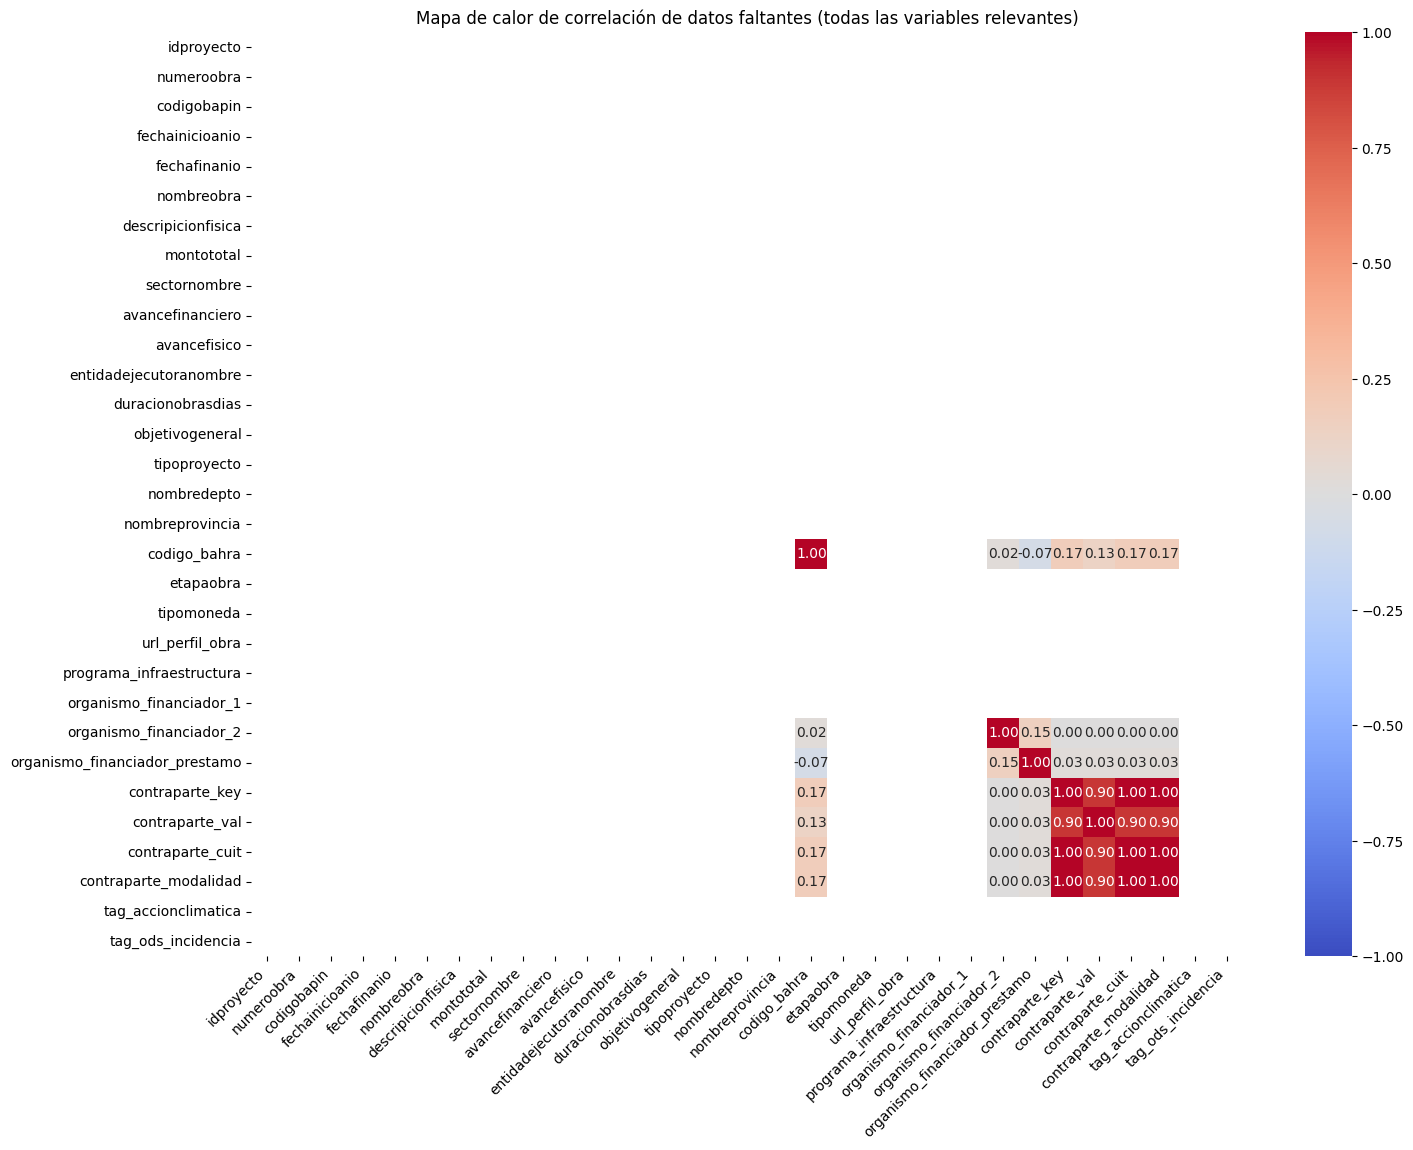

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de correlación de todas las variables relevantes con datos faltantes
Correlacion_Faltantes = df_spatial_data_works.isnull().corr()

# Aumentar el tamaño de la figura
plt.figure(figsize=(16, 12))

# Crear el mapa de calor con etiquetas rotadas en el eje X
sns.heatmap(Correlacion_Faltantes, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación de datos faltantes (todas las variables relevantes)')

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

La matriz de correlación de datos faltantes generada nos puede ayudar a identificar patrones de ausencia en los datos, si dos o más variables muestran una alta correlación en los datos faltantes (es decir valores cercanos a 1 o -1), indica que tienden a faltar juntas, lo que sugiere un patrón de ausencia.

Sin embargo, antes de eliminar variables, es importante considerar lo siguiente:

*   **Relevancia de las Variables:** Si las variables son críticas para el análisis, se puede intentar imputar los valores faltantes en lugar de eliminar las variables.
*   **Impacto en el Modelo:** Considerar cómo la eliminación afectará el análisis o modelo posterior. Variables altamente correlacionadas en términos de datos faltantes pueden estar relacionadas conceptualmente, lo que podría influir en los resultados.

*   **Análisis Exploratorio:** Continuar con el análisis exploratorio, para determinar si la eliminación de estas variables realmente mejora la calidad de los datos y la interpretación de los resultados.


###**<center>🤔¿Hay valores atípicos en el conjunto de datos?</center>**

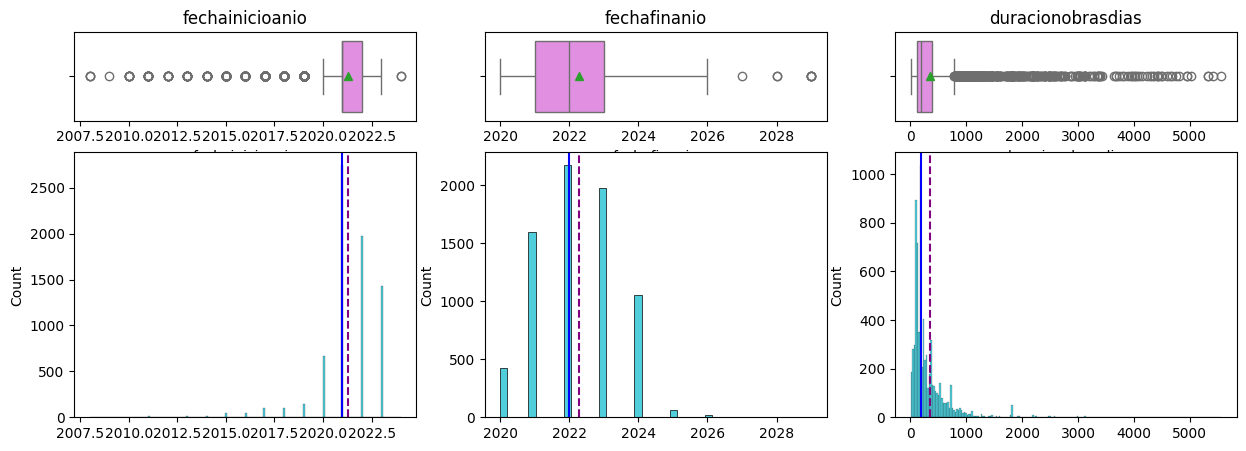

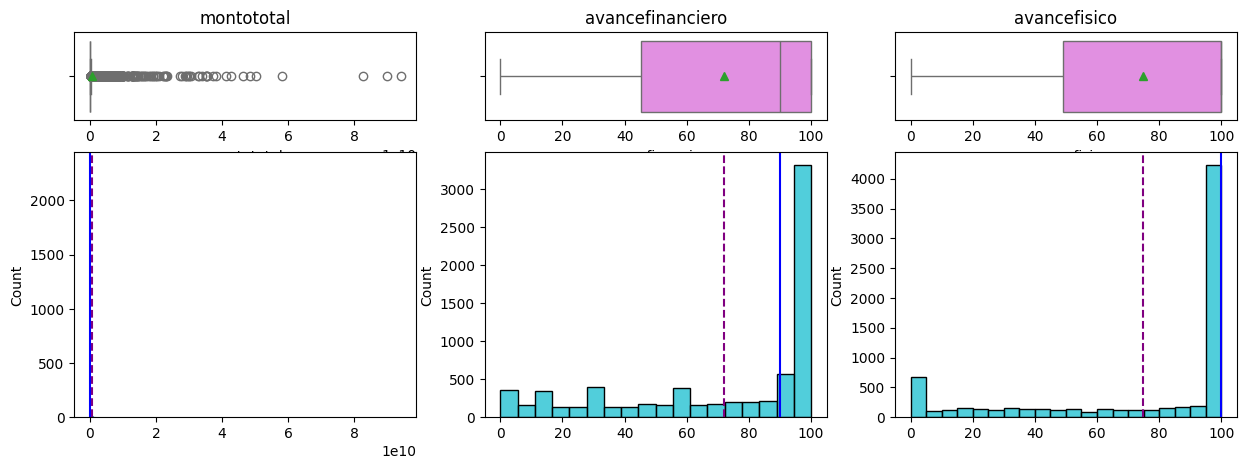

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import math  # Asegúrate de importar math

# Especificar las columnas importantes que deseas analizar
Cols_Importantes = ["fechainicioanio", "fechafinanio", "duracionobrasdias", "montototal", "avancefinanciero","avancefisico"]

def create_grid_of_plots(df, columns, figsize=(15, 5), bins=None):
    full_rows = math.floor(len(columns) / 3)
    last_row_elems = len(columns) % 3
    for i in range(0, full_rows * 3, 3):
        pltcols = columns[i:i + 3]
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=figsize, gridspec_kw={"height_ratios": (0.25, 0.75)})
        fig.subplots_adjust(hspace=0.18)
        for j in range(3):
            col = pltcols[j]
            ax = axes[0, j % 3]
            ax2 = axes[1, j % 3]
            feature = df[col]
            multi_histogram_boxplot(feature, ax, ax2, bins)
            ax.set_title(col).set_position([0.5, -3])
        plt.show()
    if last_row_elems > 0:
        pltcols = columns[len(columns) - last_row_elems:]
        if len(pltcols) == 1:
            single_histogram_boxplot(df, pltcols[0])
        else:
            fig, axes = plt.subplots(nrows=2, ncols=len(pltcols), figsize=(len(pltcols) * 5, 5), gridspec_kw={"height_ratios": (0.25, 0.75)})
            fig.subplots_adjust(hspace=0.15)
            for j in range(len(pltcols)):
                col = pltcols[j]
                ax = axes[0, j % len(pltcols)]
                ax2 = axes[1, j % len(pltcols)]
                feature = df[col]
                multi_histogram_boxplot(feature, ax, ax2, bins)
                ax.set_title(col).set_position([0.5, -3])
            plt.show()

def multi_histogram_boxplot(feature, ax, ax2, bins=None):
    sns.boxplot(feature, ax=ax, showmeans=True, color='violet', orient="h")
    if bins:
        sns.histplot(feature, kde=False, ax=ax2, bins=bins, color='tab:cyan')
    else:
        sns.histplot(feature, kde=False, ax=ax2, color='tab:cyan')
    ax2.set_xlabel('')
    ax2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax2.axvline(np.median(feature), color='blue', linestyle='-')

def single_histogram_boxplot(df, col, figsize=(5, 5), bins=None):
    feature = df[col]
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, gridspec_kw={"height_ratios": (.25, .75)}, figsize=figsize)
    ax_box2.set_title(col).set_position([0.5, -3])
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet', orient="h")
    sns.histplot(feature, kde=False, ax=ax_hist2, bins=bins, color='tab:cyan') if bins else sns.histplot(feature, kde=False, ax=ax_hist2, color='tab:cyan')
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

warnings.filterwarnings("ignore")

# Llamar a la función para crear los gráficos solo para las variables importantes
create_grid_of_plots(df_spatial_data_works, Cols_Importantes)


🔎 Para algunas de las variables numéricas seleccionadas podemos observar lo siguiente:

*  fechainicioanio: La mayoría de los proyectos tienen fechas de inicio recientes, con una media alrededor de 2020. Hay algunos valores atípicos anteriores a 2010, que podrían corresponder a proyectos excepcionales. La distribución muestra una leve concentración hacia los años más recientes, lo cual es normal en proyectos activos.

*  fechafinanio: Las fechas de finalización se concentran alrededor de 2022, con algunos outliers extendiéndose hasta 2028. Esta distribución es esperada para proyectos en curso.

*  duracionobrasdias: La duración de las obras presenta una gran variabilidad, con una media alrededor de 1000 días. Existen muchos valores atípicos por encima de esta media, indicando proyectos con duración excepcionalmente larga, lo que podría requerir una revisión más detallada. La distribución muestra un sesgo hacia la derecha, lo cual es típico en este tipo de datos.

*  montototal: La mayoría de los proyectos tienen un monto total muy concentrado en valores bajos, con algunos outliers significativos que alcanzan hasta 8e10. Esto indica una gran disparidad en el financiamiento de los proyectos, con una distribución fuertemente sesgada hacia la derecha.

*  avancefinanciero: El avance financiero de los proyectos muestra una distribución variada, con una media cercana al 80%. Hay un notable número de proyectos con un avance financiero del 100%, lo que podría indicar que están completamente financiados.

*  avancefisico: Similar al avance financiero, el avance físico también presenta una distribución con una media alrededor del 80%, con muchos proyectos que han alcanzado el 100%. Esto sugiere que muchos proyectos están cerca de su finalización física.

###**<center>🤔¿Cuál es la cardinalidad de las variables categóricas?</center>**

**********************************************************************************************
A continuación se detalla la cardinalidad para las columnas categóricas del conjunto de datos:
**********************************************************************************************
numeroobra                  7212
codigobapin                 2895
nombreobra                  6758
descripicionfisica          4988
sectornombre                   9
entidadejecutoranombre        16
objetivogeneral             4988
tipoproyecto                 195
nombredepto                  418
nombreprovincia               24
etapaobra                      3
tipomoneda                     2
url_perfil_obra             7317
programa_infraestructura       5
organismo_financiador_1        6
organismo_financiador_2        2
contraparte_key                3
contraparte_val             1707
contraparte_cuit             335
contraparte_modalidad          7
tag_accionclimatica            4
tag_ods_incidencia    

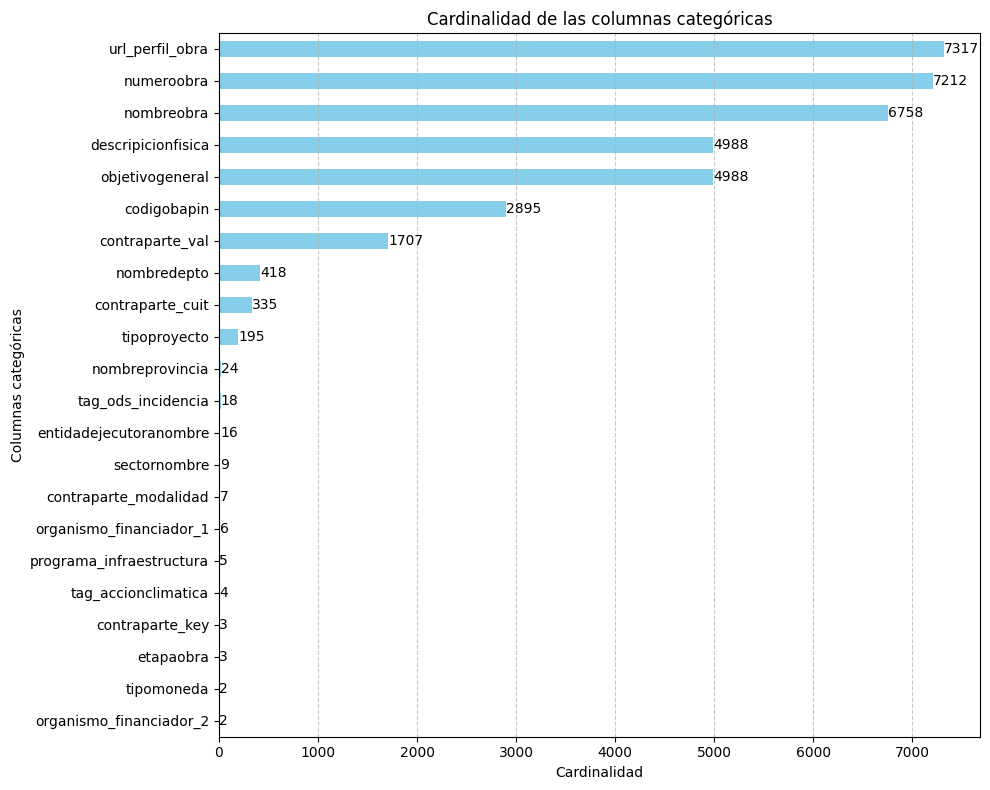

In [11]:
import matplotlib.pyplot as plt

# Cargamos solo las columnas categóricas
Columnas_Categoricas = df_spatial_data_works.select_dtypes(include=['object']).columns

# Calculamos la cardinalidad de las columnas categóricas
Cardinalidad_Categoricas = df_spatial_data_works[Columnas_Categoricas].nunique()

print("**********************************************************************************************")
print("A continuación se detalla la cardinalidad para las columnas categóricas del conjunto de datos:")
print("**********************************************************************************************")
print(Cardinalidad_Categoricas)

# Graficamos la cardinalidad de las columnas categóricas
plt.figure(figsize=(10, 8))
barplot = Cardinalidad_Categoricas.sort_values().plot(kind='barh', color='skyblue')
plt.title('Cardinalidad de las columnas categóricas')
plt.xlabel('Cardinalidad')
plt.ylabel('Columnas categóricas')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Colocamos los valores únicos en cada barra
for i, v in enumerate(Cardinalidad_Categoricas.sort_values()):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

🔎 En el análisis de la cardinalidad de las variables categóricas, encontramos que la columna url_perfil_obra tiene 7317 valores únicos, numeroobra cuenta con 7212 valores distintos, y nombreobra presenta 6758 categorías diferentes. Otras columnas, como nombredepto y tipoproyecto, muestran menor cardinalidad, con 418 y 195 valores únicos, respectivamente. Estos resultados nos ayudarán a comprender la diversidad y distribución de las categorías en el conjunto de datos, lo que es crucial para el modelado y análisis posterior.

###**<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos?</center>**

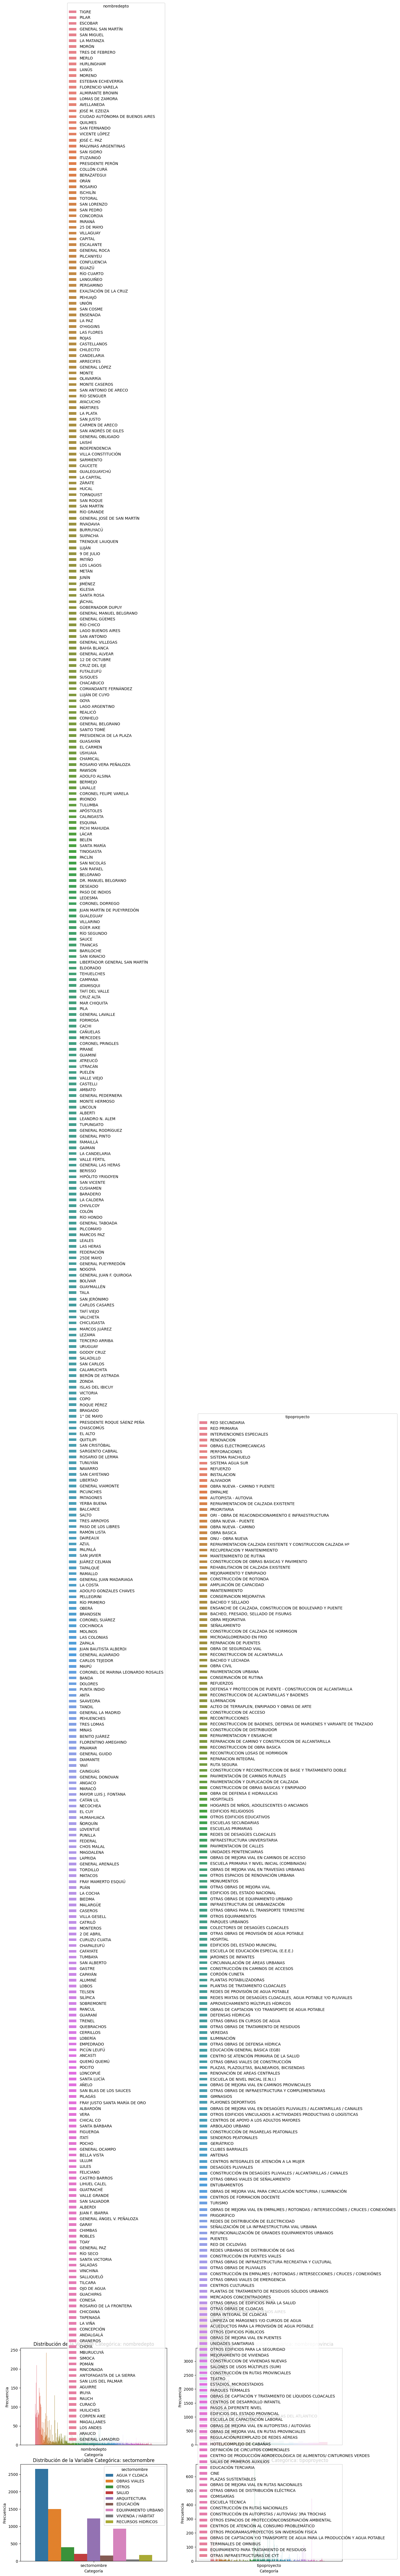

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar algunas columnas categóricas de interés
Columnas_Categoricas = ['nombredepto', 'nombreprovincia', 'sectornombre', 'tipoproyecto']

# Configurar subplots para mostrar las distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar la primera columna categórica
sns.countplot(data=pd.melt(df_spatial_data_works[['nombredepto']]), x='variable', hue='value', ax=axes[0, 0])
axes[0, 0].set_xlabel('Categoría')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de la Variable Categórica: nombredepto')
axes[0, 0].legend(title='nombredepto')

# Graficar la segunda columna categórica
sns.countplot(data=pd.melt(df_spatial_data_works[['nombreprovincia']]), x='variable', hue='value', ax=axes[0, 1])
axes[0, 1].set_xlabel('Categoría')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de la Variable Categórica: nombreprovincia')
axes[0, 1].legend(title='nombreprovincia')

# Graficar la tercera columna categórica
sns.countplot(data=pd.melt(df_spatial_data_works[['sectornombre']]), x='variable', hue='value', ax=axes[1, 0])
axes[1, 0].set_xlabel('Categoría')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de la Variable Categórica: sectornombre')
axes[1, 0].legend(title='sectornombre')

# Graficar la cuarta columna categórica
sns.countplot(data=pd.melt(df_spatial_data_works[['tipoproyecto']]), x='variable', hue='value', ax=axes[1, 1])
axes[1, 1].set_xlabel('Categoría')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de la Variable Categórica: tipoproyecto')
axes[1, 1].legend(title='tipoproyecto')

plt.tight_layout()
plt.show()

Aquí algunas conclusiones de los gráficos de las variables categoricas:
<br><br>
*  departamentos, con las opciones más frecuentes representando una gran proporción del total de proyectos. Por ejemplo, los departamentos más comunes podrían concentrar más del 50% de los proyectos, lo que indica una fuerte centralización geográfica de las inversiones.

*  nombreprovincia: De las 24 opciones disponibles en nombreprovincia, unas pocas dominan significativamente, lo que sugiere que la mayoría de los proyectos se encuentran en un pequeño número de provincias. Por ejemplo, las 5 provincias más frecuentes podrían abarcar el 80% de los proyectos, lo que refleja una distribución geográfica desigual.

*  sectornombre: La variable sectornombre revela que ciertos sectores, como infraestructura o educación, pueden estar altamente priorizados, con solo unos pocos sectores representando la mayoría de los proyectos. Esto indica áreas de enfoque clave en la inversión pública.

*  tipoproyecto: Aunque hay 195 tipos de proyectos, algunos tipos específicos, como construcción o renovación, son mucho más comunes. Por ejemplo, los 10 tipos de proyectos más frecuentes podrían cubrir el 70% del total, destacando las áreas de intervención preferidas.

* Estos insights sugieren que hay una concentración significativa tanto geográfica como sectorial en los datos, lo que podría influir en los resultados del análisis y debería considerarse en el modelado posterior.

🔍 Dado que tenemos variables categóricas como **nombredepto con 418 opciones**, **nombreprovincia con 24 opciones**, y **tipoproyecto con 195 opciones**, se ha refactorizado el código para mostrar el top 10 de cada una de estas variables.

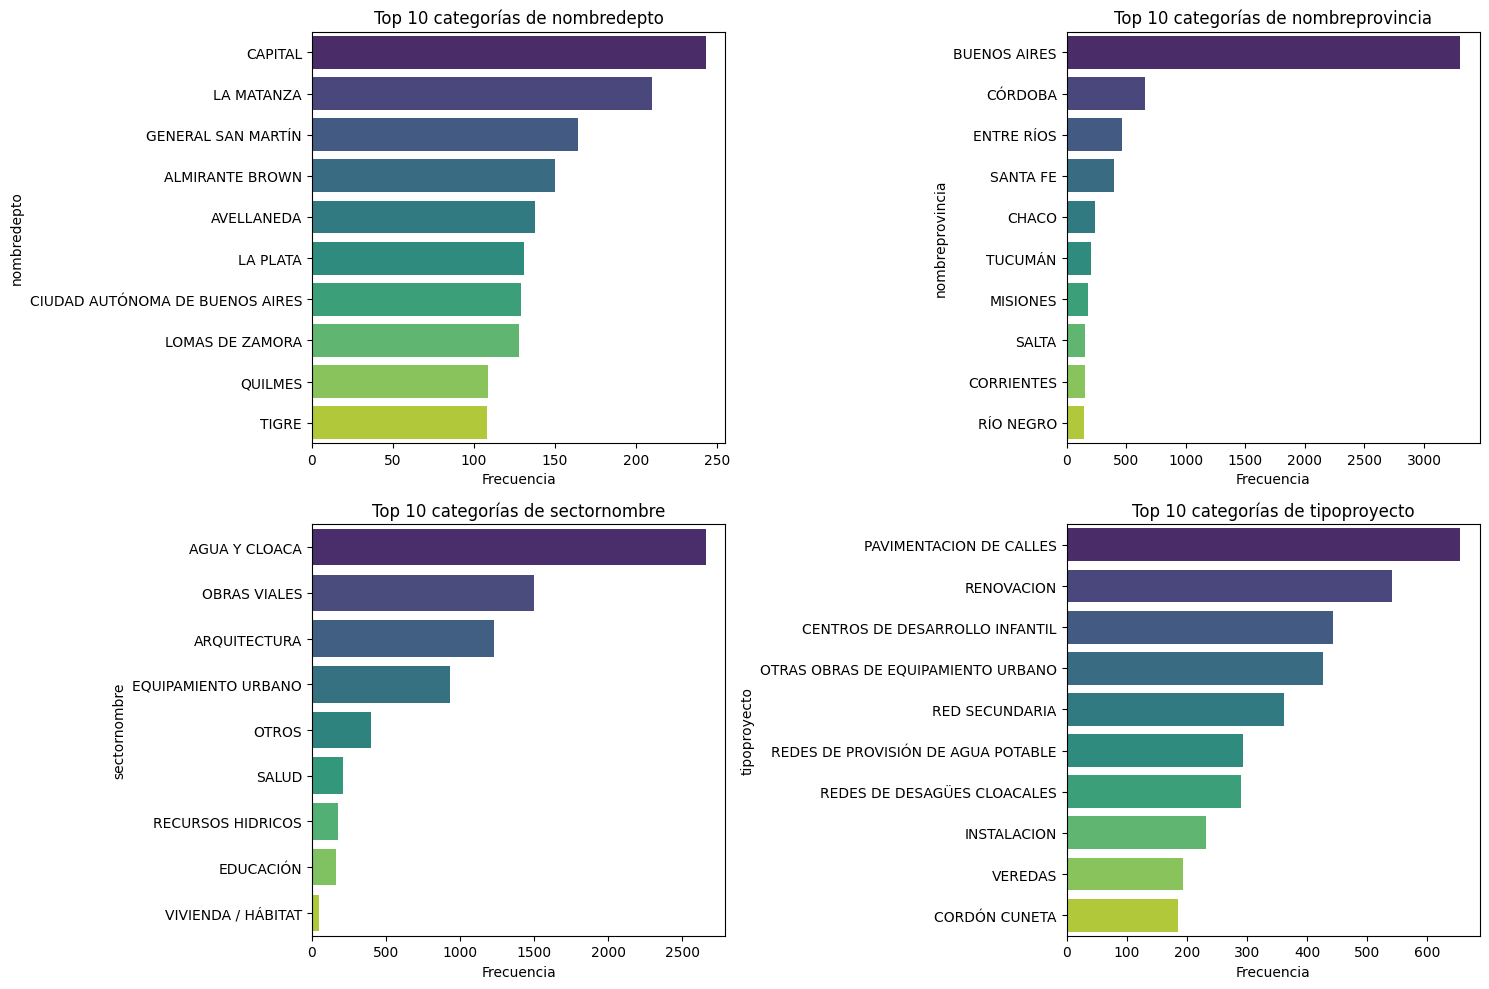

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar las columnas categóricas de interés
Columnas_Categoricas = ['nombredepto', 'nombreprovincia', 'sectornombre', 'tipoproyecto']

# Configurar subplots para mostrar las distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Función para graficar el top n de categorías
def plot_top_n_categories(column, n=10, ax=None):
    top_n = df_spatial_data_works[column].value_counts().nlargest(n)
    sns.barplot(x=top_n.values, y=top_n.index, ax=ax, palette='viridis')
    ax.set_title(f'Top {n} categorías de {column}')
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel(column)

# Graficar el top de categorías para cada columna categórica
plot_top_n_categories('nombredepto', n=10, ax=axes[0, 0])
plot_top_n_categories('nombreprovincia', n=10, ax=axes[0, 1])
plot_top_n_categories('sectornombre', n=10, ax=axes[1, 0])
plot_top_n_categories('tipoproyecto', n=10, ax=axes[1, 1])

plt.tight_layout()
plt.show()

###**<center>🤔¿Necesitamos aplicar alguna transformación no lineal?</center>**

🔍 **Conclusión:** No se requiere aplicar transformaciones no lineales a las variables categóricas, ya que sus distribuciones no presentan sesgos significativos ni outliers fuera de las categorías predefinidas. En lugar de transformaciones no lineales, se recomienda aplicar técnicas de codificación como One-Hot Encoding o Target Encoding para convertir las categorías en valores numéricos, facilitando así su uso en modelos predictivos. Además, considerar la agrupación de categorías con baja frecuencia puede simplificar el modelo y mejorar su rendimiento.

###**<center>🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>**

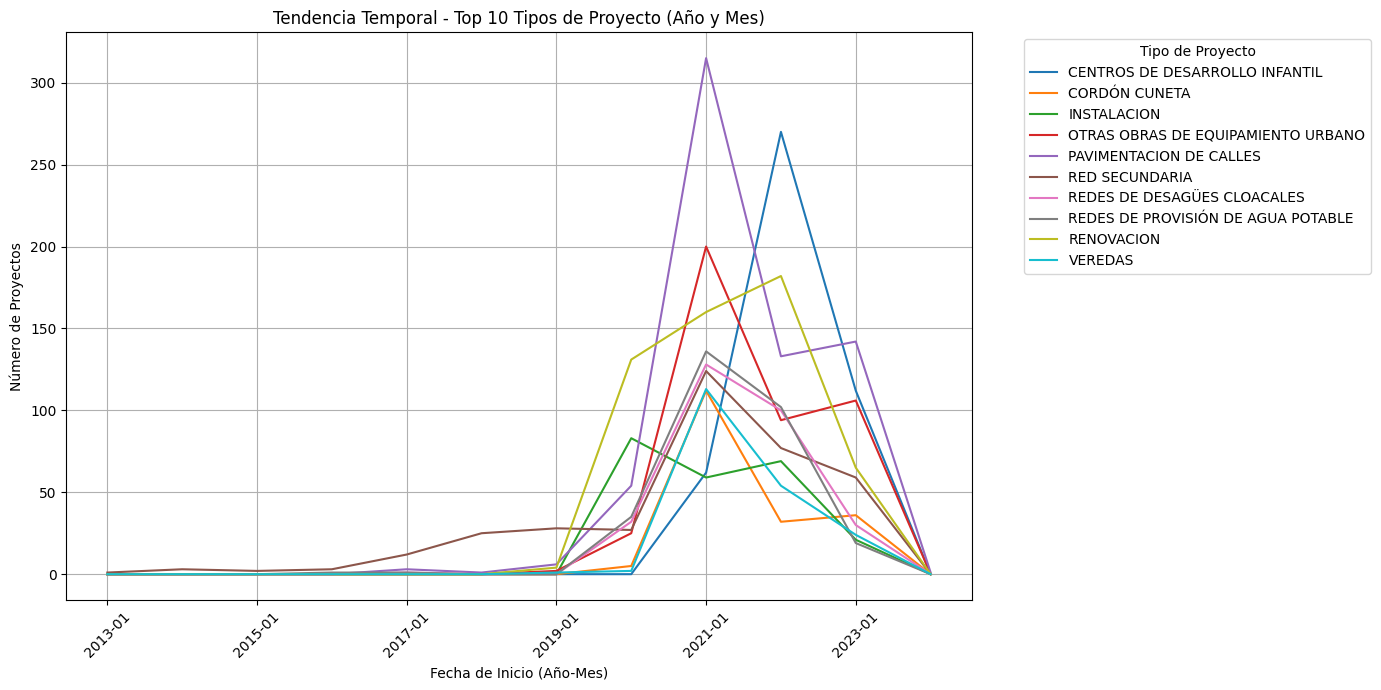

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'fechainicioanio' a tipo datetime si no está en ese formato
df_spatial_data_works['fechainicioanio'] = pd.to_datetime(df_spatial_data_works['fechainicioanio'])

# Asegurar que el formato de fecha incluye tanto el año como el mes
df_spatial_data_works['anio_mes'] = df_spatial_data_works['fechainicioanio'].dt.to_period('M').astype(str)

# Contar el número de proyectos por año-mes y tipo de proyecto
top_tipos_proyecto = df_spatial_data_works['tipoproyecto'].value_counts().nlargest(10).index
df_filtrado = df_spatial_data_works[df_spatial_data_works['tipoproyecto'].isin(top_tipos_proyecto)]
ocurrencias_por_fecha = df_filtrado.groupby(['anio_mes', 'tipoproyecto']).size().unstack(fill_value=0)

# Graficar las tendencias temporales con año y mes en formato string
plt.figure(figsize=(14, 7))
ocurrencias_por_fecha.plot(ax=plt.gca())
plt.xlabel('Fecha de Inicio (Año-Mes)')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal - Top 10 Tipos de Proyecto (Año y Mes)')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor legibilidad
plt.legend(title='Tipo de Proyecto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


🔎 Podemos observar una tendencia temporal en los datos que muestra un notable aumento en el número de proyectos iniciados a partir de 2020, alcanzando su punto máximo en 2021. Este comportamiento sugiere una respuesta a necesidades urgentes o políticas específicas implementadas durante ese período. Posteriormente, la tendencia muestra una disminución significativa en 2022 y 2023, lo que podría reflejar un ajuste en las prioridades de inversión o restricciones presupuestarias. Los tipos de proyectos más comunes, como "Centros de Desarrollo Infantil" y "Pavimentación de Calles," destacan por su frecuencia y relevancia en la planificación.

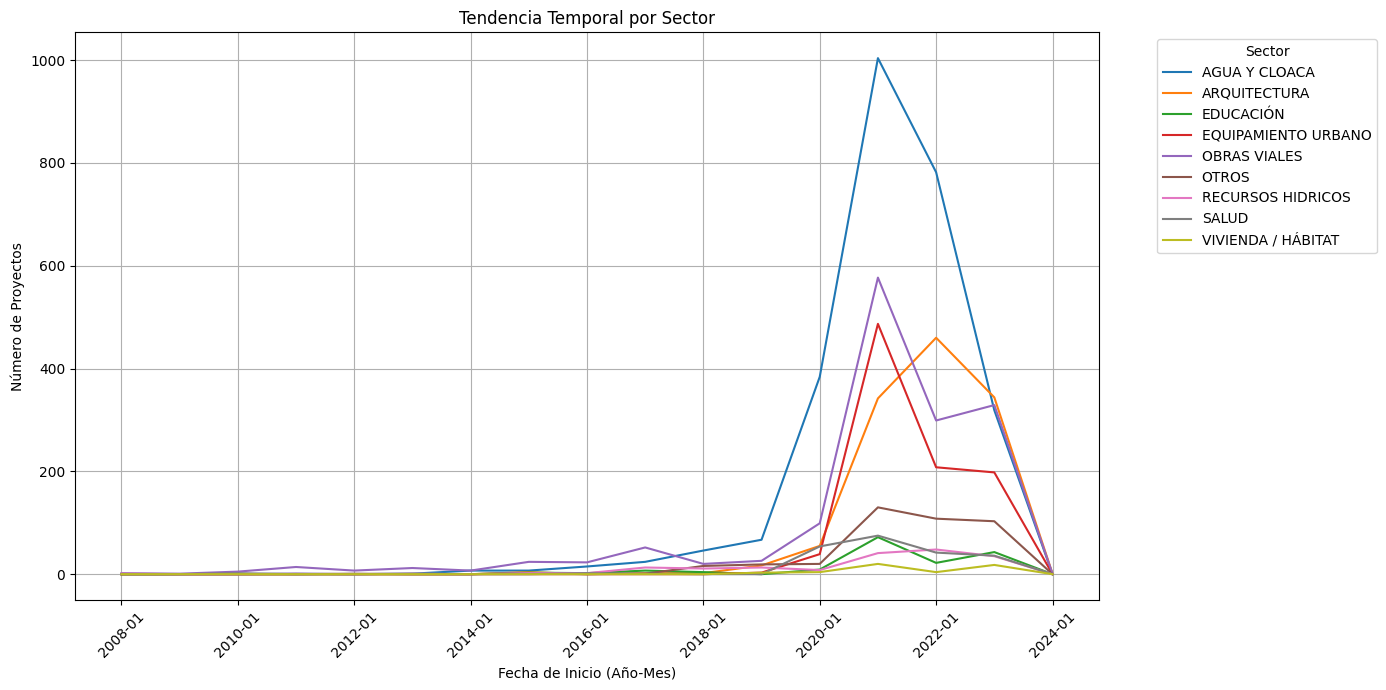

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar el número de proyectos por año-mes y sector
df_spatial_data_works['anio_mes'] = df_spatial_data_works['fechainicioanio'].dt.to_period('M').astype(str)
ocurrencias_por_fecha_sector = df_spatial_data_works.groupby(['anio_mes', 'sectornombre']).size().unstack(fill_value=0)

# Graficar las tendencias temporales para los sectores
plt.figure(figsize=(14, 7))
ocurrencias_por_fecha_sector.plot(ax=plt.gca())
plt.xlabel('Fecha de Inicio (Año-Mes)')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal por Sector')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

🔎 Conclusiones:

Podemos observar una tendencia temporal clara en los proyectos según el sector. El sector "Agua y Cloaca" experimenta un incremento notable, alcanzando su punto máximo en 2021, seguido por "Arquitectura" y "Equipamiento Urbano". Estos sectores muestran una respuesta a necesidades críticas, posiblemente impulsadas por políticas públicas o programas de infraestructura. Sin embargo, a partir de 2022, se evidencia una disminución significativa en todos los sectores, lo que sugiere un ajuste en las prioridades de inversión o restricciones presupuestarias.

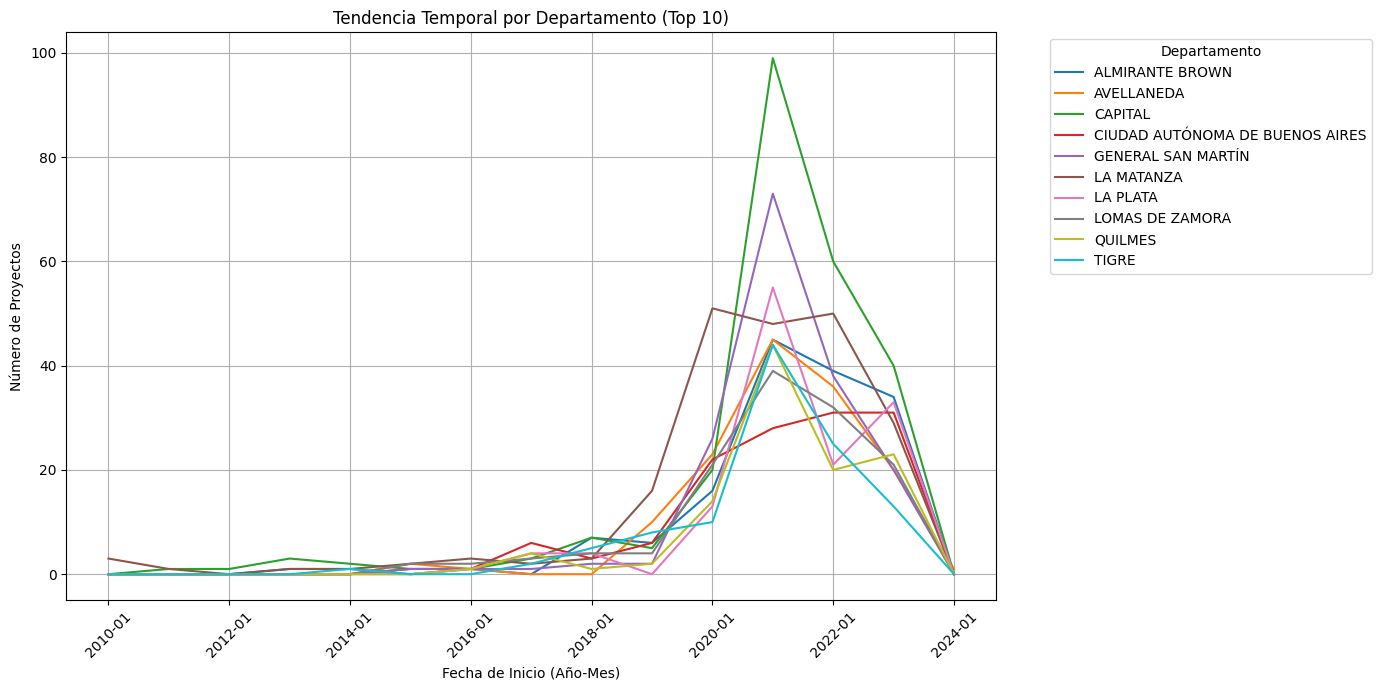

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener el top 10 de los departamentos más comunes
top_nombredepto = df_spatial_data_works['nombredepto'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo los departamentos del top 10
df_filtrado_depto = df_spatial_data_works[df_spatial_data_works['nombredepto'].isin(top_nombredepto)]

# Agrupar por fecha exacta y nombredepto
ocurrencias_por_fecha_depto = df_filtrado_depto.groupby(['anio_mes', 'nombredepto']).size().unstack(fill_value=0)

# Graficar las tendencias temporales para los departamentos seleccionados
plt.figure(figsize=(14, 7))
ocurrencias_por_fecha_depto.plot(ax=plt.gca())
plt.xlabel('Fecha de Inicio (Año-Mes)')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal por Departamento (Top 10)')
plt.legend(title='Departamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**🔎 Conclusiones del Gráfico de Tendencia Temporal por Departamento (Top 10):**

*  Concentración de Proyectos en Departamentos Clave: Los departamentos como "Capital," "Ciudad Autónoma de Buenos Aires," y "La Plata" muestran un notable incremento en proyectos, especialmente durante el periodo 2020-2021, lo que indica una alta concentración de inversión en estas áreas metropolitanas.

*  Disminución en 2022-2023: Después del pico en 2021, todos los departamentos experimentan una caída en el número de proyectos, lo que podría reflejar un cambio en las políticas de inversión o en las condiciones económicas.

*  Patrones Similares en los Departamentos: Aunque algunos departamentos tienen más proyectos que otros, la mayoría sigue un patrón temporal similar, sugiriendo que las decisiones de inversión fueron influenciadas por factores comunes en la región.

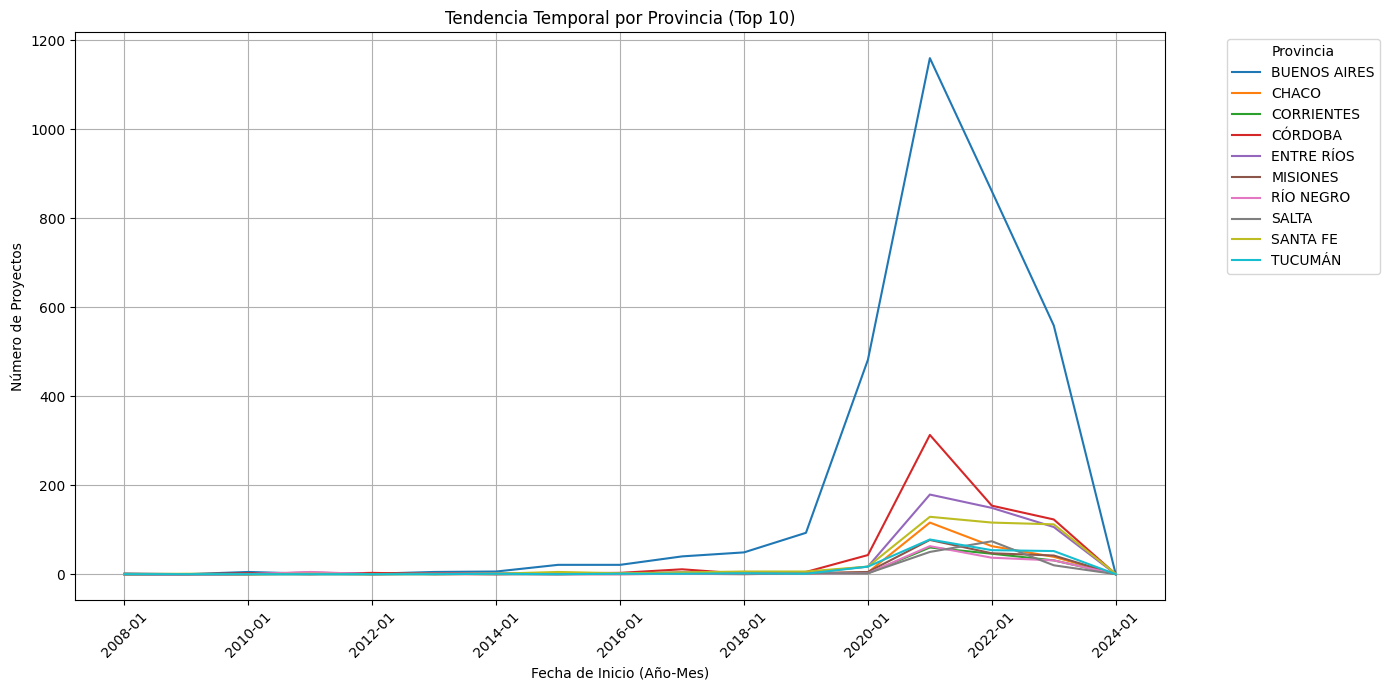

In [31]:
# Obtener el top 10 de las provincias más comunes
top_nombreprovincia = df_spatial_data_works['nombreprovincia'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo las provincias del top 10
df_filtrado_provincia = df_spatial_data_works[df_spatial_data_works['nombreprovincia'].isin(top_nombreprovincia)]

# Agrupar por fecha exacta y nombreprovincia
ocurrencias_por_fecha_provincia = df_filtrado_provincia.groupby(['anio_mes', 'nombreprovincia']).size().unstack(fill_value=0)

# Graficar las tendencias temporales para las provincias seleccionadas
plt.figure(figsize=(14, 7))
ocurrencias_por_fecha_provincia.plot(ax=plt.gca())
plt.xlabel('Fecha de Inicio (Año-Mes)')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal por Provincia (Top 10)')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**🔎 Conclusiones del Gráfico de Tendencia Temporal por Provincia (Top 10):**

*  Dominancia de Buenos Aires: La provincia de Buenos Aires lidera claramente el número de proyectos, con un pico significativo en 2021 que supera los 1000 proyectos, destacándose sobre otras provincias.

*  Concentración en Provincias Clave: Además de Buenos Aires, provincias como Córdoba, Santa Fe y Misiones también muestran una actividad significativa en 2021, aunque en menor escala.

*  Disminución Generalizada: Al igual que en el análisis por departamentos, hay una disminución drástica en el número de proyectos en 2022 y 2023, lo que podría reflejar un cambio en las prioridades de inversión o restricciones presupuestarias.

*  Crecimiento Acelerado: La mayoría de las provincias muestra un crecimiento casi simultáneo en el número de proyectos a partir de 2020, lo que sugiere una coordinación en las políticas de inversión pública a nivel nacional.

###**<center>🤔¿Hay correlación entre las variables dependientes e independientes?</center>**

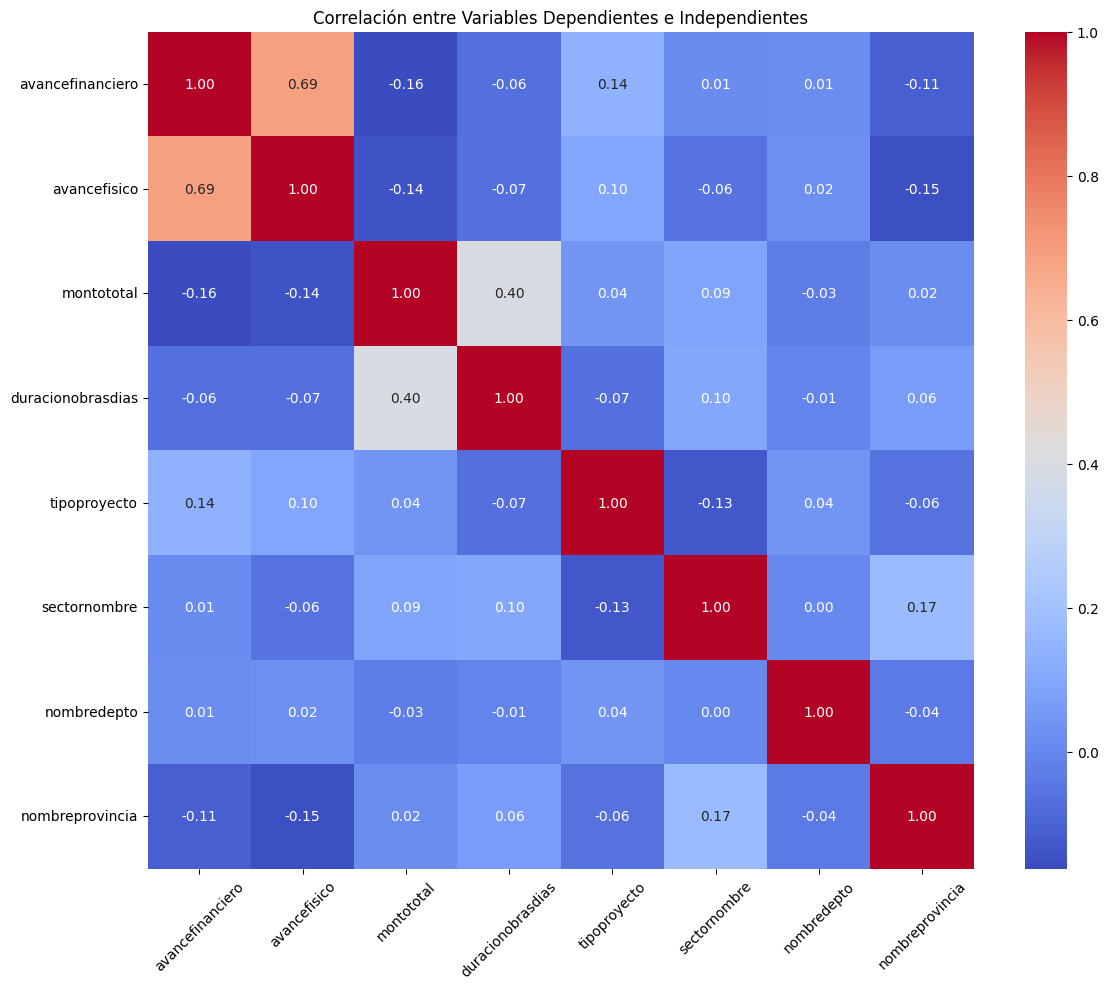

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir las fechas a tipo datetime si no están en ese formato
df_spatial_data_works['fechainicioanio'] = pd.to_datetime(df_spatial_data_works['fechainicioanio'], errors='coerce')
df_spatial_data_works['fechafinanio'] = pd.to_datetime(df_spatial_data_works['fechafinanio'], errors='coerce')

# Convertir las variables categóricas a variables numéricas utilizando códigos
df_spatial_data_works['tipoproyecto'] = pd.Categorical(df_spatial_data_works['tipoproyecto']).codes
df_spatial_data_works['sectornombre'] = pd.Categorical(df_spatial_data_works['sectornombre']).codes
df_spatial_data_works['nombredepto'] = pd.Categorical(df_spatial_data_works['nombredepto']).codes
df_spatial_data_works['nombreprovincia'] = pd.Categorical(df_spatial_data_works['nombreprovincia']).codes

# Asegurarse de que las variables numéricas estén correctamente tipificadas
df_spatial_data_works['montototal'] = pd.to_numeric(df_spatial_data_works['montototal'], errors='coerce')
df_spatial_data_works['avancefinanciero'] = pd.to_numeric(df_spatial_data_works['avancefinanciero'], errors='coerce')
df_spatial_data_works['avancefisico'] = pd.to_numeric(df_spatial_data_works['avancefisico'], errors='coerce')
df_spatial_data_works['duracionobrasdias'] = pd.to_numeric(df_spatial_data_works['duracionobrasdias'], errors='coerce')

# Eliminar filas con valores NaN en las columnas relevantes
df_spatial_data_works.dropna(subset=['avancefinanciero', 'avancefisico', 'montototal', 'duracionobrasdias',
                                     'tipoproyecto', 'sectornombre', 'nombredepto', 'nombreprovincia'], inplace=True)

# Crear la matriz de correlación entre las variables dependientes e independientes
correlation_matrix = df_spatial_data_works[['avancefinanciero', 'avancefisico', 'montototal', 'duracionobrasdias',
                                            'tipoproyecto', 'sectornombre', 'nombredepto', 'nombreprovincia']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables Dependientes e Independientes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

🔎 Algunas de las conclusiones obtenidas para calcular la correlación entre las variables dependientes e independientes:

*  Avance financiero y Avance físico: Existe una fuerte correlación positiva de 0.69 entre estas dos variables, lo que sugiere que el progreso financiero y el progreso físico de los proyectos tienden a avanzar juntos.

*  Duración de la obra y Monto total: Hay una correlación moderada de 0.40 entre la duración de las obras y el monto total, lo que indica que los proyectos de mayor duración tienden a requerir mayores inversiones.

*  Sectornombre, nombredepto, y nombreprovincia: Estas variables no tienen una correlación significativa con las variables dependientes (avance financiero y físico), lo que indica que la ubicación geográfica o el sector no influyen directamente en el progreso de los proyectos.

*  Estas observaciones ayudan a comprender qué factores están más estrechamente relacionados con el éxito o progreso de los proyectos, lo cual es clave para planificar y priorizar futuras inversiones en infraestructura.

###**<center>🤔¿Cómo se distribuyen los datos en función de diferentes categorías</center>**

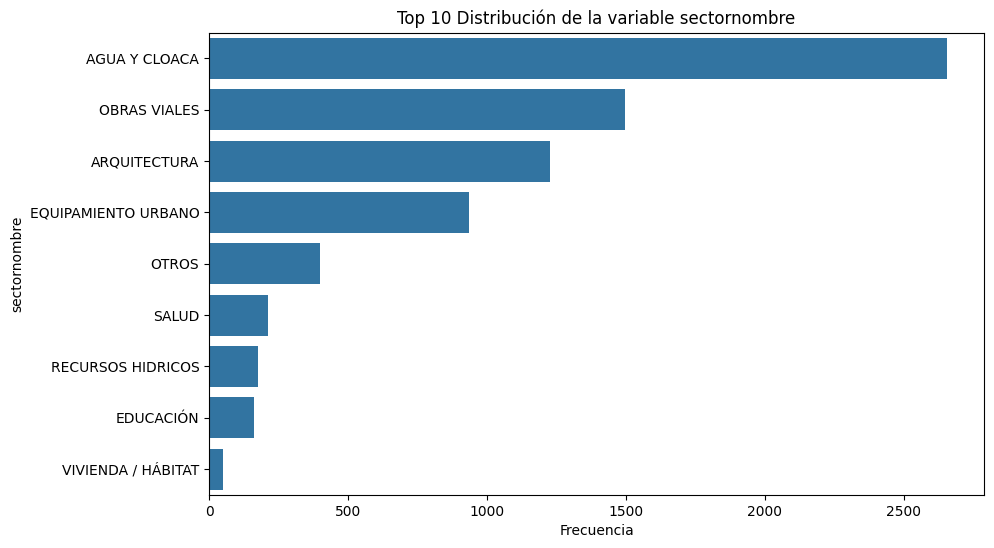

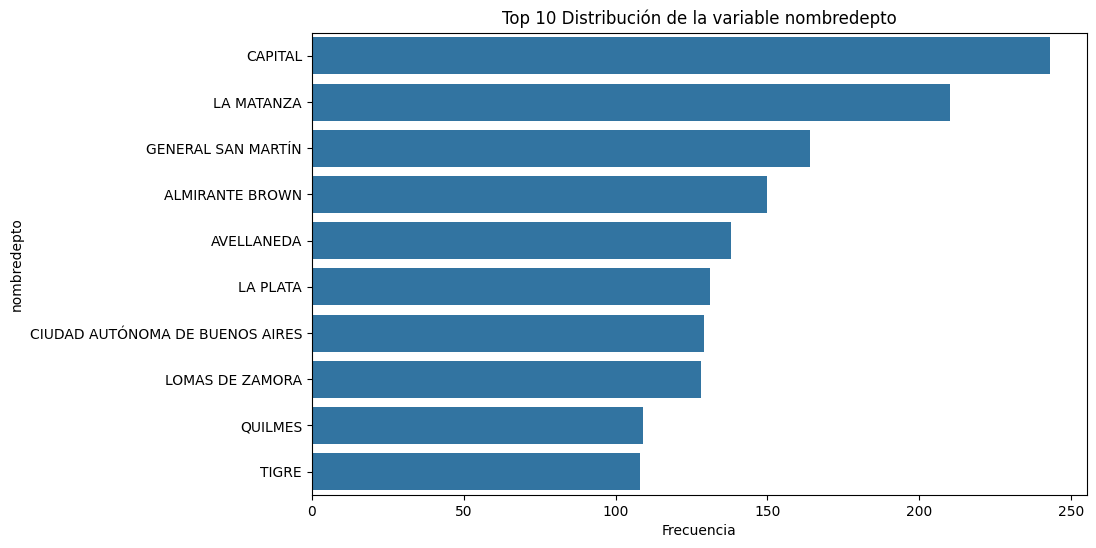

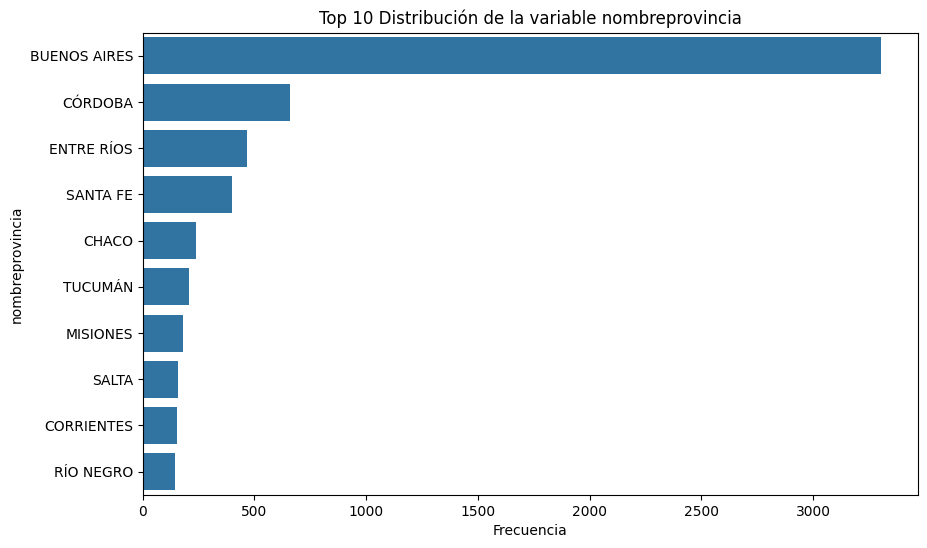

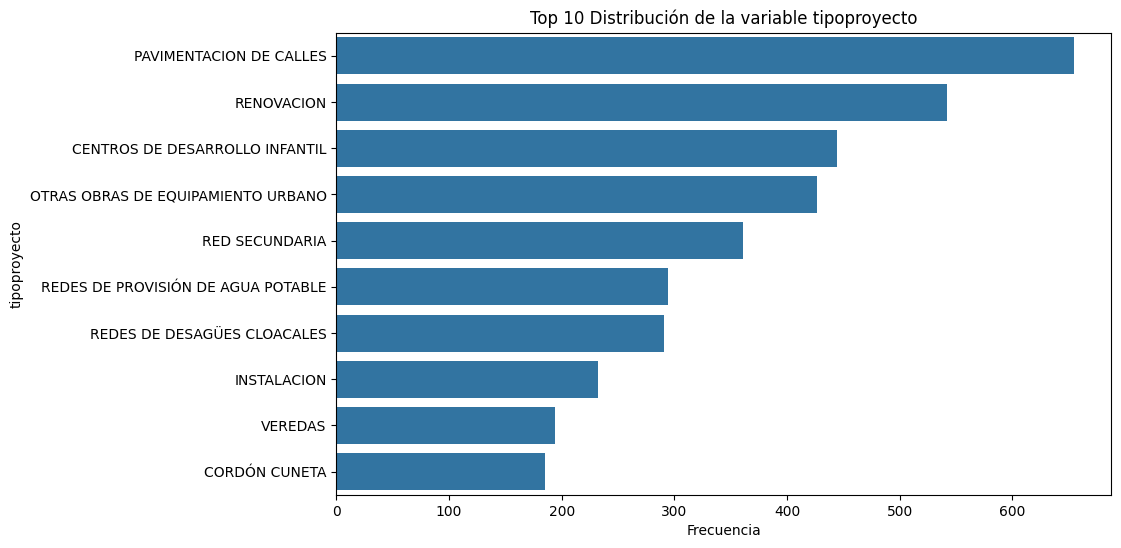

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas que deseas analizar
categorical_columns = ['sectornombre', 'nombredepto', 'nombreprovincia', 'tipoproyecto']

# Crear un gráfico de barras para el top 10 de cada variable categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    # Filtrar las 10 categorías más frecuentes y mostrar las opciones reales
    top_categories = df_spatial_data_works_dis_cat[column].value_counts().nlargest(10)
    sns.countplot(data=df_spatial_data_works_dis_cat[df_spatial_data_works_dis_cat[column].isin(top_categories.index)],
                  y=column, order=top_categories.index)
    plt.title(f'Top 10 Distribución de la variable {column}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)
    plt.show()


**🔎 Distribución de las variables categóricas:**

*  sectornombre: Los sectores con mayor cantidad de proyectos son "Agua y Cloaca" y "Obras Viales", con una alta concentración en estos sectores clave. Otros sectores como "Arquitectura" y "Equipamiento Urbano" también presentan una cantidad significativa de proyectos.

*  nombredepto: Los departamentos con mayor cantidad de proyectos incluyen "Capital", "La Matanza", y "General San Martín". Estos representan áreas geográficas con mayor actividad de inversión pública.

*  nombreprovincia: "Buenos Aires" sobresale significativamente en comparación con otras provincias como "Córdoba" y "Entre Ríos". Esto sugiere una concentración geográfica en la inversión.

*  tipoproyecto: Los tipos de proyecto más comunes incluyen "Pavimentación de Calles", "Renovación", y "Centros de Desarrollo Infantil", reflejando las prioridades en infraestructura y desarrollo urbano.
Estas distribuciones muestran una tendencia a concentrar proyectos en ciertas áreas geográficas y sectores, lo que podría estar relacionado con las prioridades de desarrollo y las necesidades específicas de infraestructura en estas regiones.

###**<center>🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>**

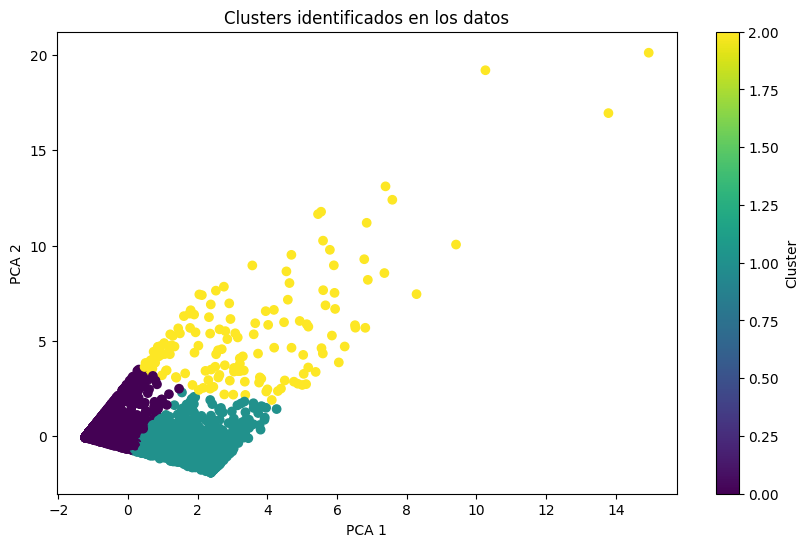

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seleccionar las características numéricas para el clustering
numeric_columns = ['avancefinanciero', 'avancefisico', 'montototal', 'duracionobrasdias']
data_for_clustering = df_spatial_data_works[numeric_columns]

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Aplicar PCA para reducir la dimensionalidad y facilitar la visualización
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Aplicar K-means con un número predefinido de clusters, por ejemplo, 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Añadir los clusters al DataFrame original
df_spatial_data_works['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters identificados en los datos')
plt.colorbar(label='Cluster')
plt.show()

🔎 Explicación Ampliada del Resultado:

*  Tres Clusters Identificados: El análisis de clustering ha revelado tres grupos principales dentro de los datos, lo que indica que los proyectos analizados presentan características similares que permiten agruparlos en estos clusters. Esta agrupación sugiere patrones distintivos en la forma en que se estructuran y gestionan los proyectos.

*  Distribución de los Clusters: El cluster amarillo se caracteriza por una mayor dispersión de datos, lo que implica una mayor variabilidad en las características de los proyectos que lo componen. Por otro lado, los clusters morado y verde presentan una distribución más concentrada, lo que sugiere que los proyectos en estos grupos son más homogéneos, compartiendo atributos o criterios de selección más definidos.

*  Importancia de los Clusters: La identificación de estos clusters es fundamental para optimizar la toma de decisiones en la planificación de la inversión pública y privada. Al reconocer los patrones dentro de cada grupo, las autoridades y las entidades responsables pueden asignar recursos de manera más estratégica para mejorar la infraestructura y cerrar brechas de desarrollo. Este enfoque también facilita la orientación de las inversiones hacia la promoción de la resiliencia climática, la igualdad de género, la buena gobernanza y el desarrollo sostenible.

*  **Siguiente Fase:** En la siguiente fase, se realizará un análisis más detallado utilizando el algoritmo K-Means. Este análisis incorporará la latitud y longitud, al menos a nivel de los nombres de departamentos y provincias, lo que permitirá una visualización geoespacial de los clusters. Esto mejorará la comprensión de cómo se distribuyen geográficamente los proyectos y ayudará a identificar áreas prioritarias para intervenciones específicas.

##**Proyectos de Inversión de la República Argentina (url_investment_projects)**

Contiene información de los proyectos de obras de Inversión de La República Argentina

###**<center>🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>**

###**<center>🤔¿Hay valores faltantes en el conjunto de datos?</center>**

###**<center>🤔¿Se pueden identificar patrones de ausencia?</center>**

###**<center>🤔¿Hay valores atípicos en el conjunto de datos?</center>**

###**<center>🤔¿Cuál es la cardinalidad de las variables categóricas?</center>**

###**<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos?</center>**

###**<center>🤔¿Necesitamos aplicar alguna transformación no lineal?</center>**

###**<center>🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>**

###**<center>🤔¿Hay correlación entre las variables dependientes e independientes?</center>**

###**<center>🤔¿Cómo se distribuyen los datos en función de diferentes categorías</center>**

###**<center>🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>**

##**Obras de la República Argentina (url_datos_espaciales)**

Contiene información de las Obras de la República Argentina

###**<center>🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>**

###**<center>🤔¿Hay valores faltantes en el conjunto de datos?</center>**

###**<center>🤔¿Se pueden identificar patrones de ausencia?</center>**

###**<center>🤔¿Hay valores atípicos en el conjunto de datos?</center>**

###**<center>🤔¿Cuál es la cardinalidad de las variables categóricas?</center>**

###**<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos?</center>**

###**<center>🤔¿Necesitamos aplicar alguna transformación no lineal?</center>**

###**<center>🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>**

###**<center>🤔¿Hay correlación entre las variables dependientes e independientes?</center>**

###**<center>🤔¿Cómo se distribuyen los datos en función de diferentes categorías</center>**

###**<center>🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>**